In [11]:
import cv2
import math
import matplotlib.pyplot as plt
from random import randrange
import lane_detection
import lane_following
import numpy as np

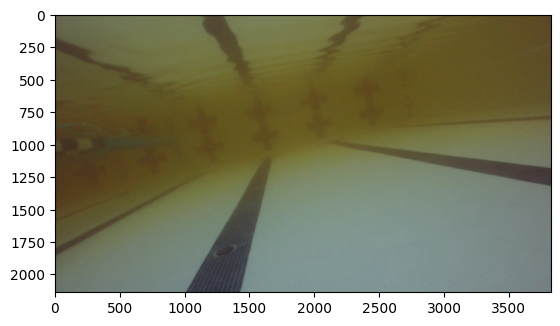

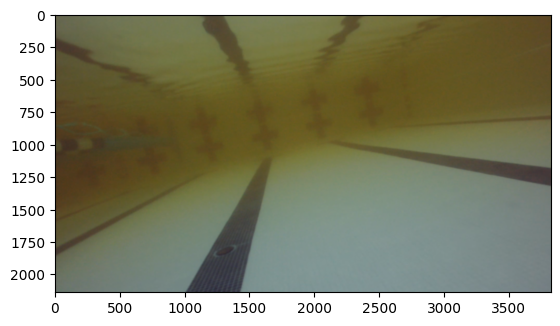

In [12]:
img = cv2.imread('lanes.png').copy()
plt.imshow(img)
plt.show()
blur = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
plt.imshow(blur)
plt.show()

array([[[ 98, 101,  80],
        [ 98, 101,  80],
        [ 98, 101,  80],
        ...,
        [ 89,  71,  38],
        [ 89,  71,  38],
        [ 90,  71,  38]],

       [[ 99, 101,  81],
        [ 99, 101,  81],
        [ 99, 101,  81],
        ...,
        [ 88,  71,  38],
        [ 88,  71,  38],
        [ 89,  71,  38]],

       [[ 99, 102,  81],
        [100, 102,  81],
        [100, 102,  81],
        ...,
        [ 87,  71,  38],
        [ 88,  71,  38],
        [ 88,  71,  39]],

       ...,

       [[101, 114, 104],
        [101, 115, 104],
        [102, 116, 105],
        ...,
        [115, 126, 130],
        [115, 126, 130],
        [115, 126, 130]],

       [[101, 115, 104],
        [101, 115, 105],
        [102, 116, 105],
        ...,
        [116, 127, 130],
        [116, 127, 130],
        [116, 127, 130]],

       [[102, 115, 104],
        [102, 115, 105],
        [102, 116, 106],
        ...,
        [116, 127, 131],
        [116, 127, 131],
        [116, 127, 131]]

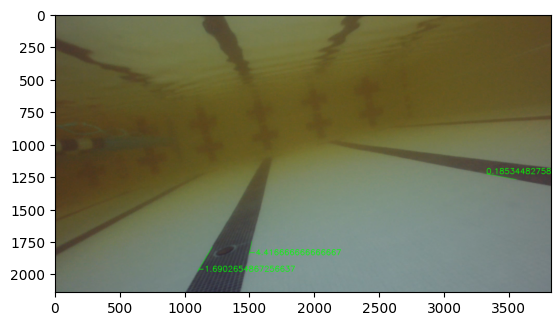

In [13]:
img = cv2.imread('lanes.png').copy()
#lines = detect_lines(img, 35, 65, 3, 150, 15)
lines = lane_detection.detect_lines(img, 20, 50, 3, 100, 15)
lane_detection.draw_lines(img, lines)


array([[[ 98, 101,  80],
        [ 98, 101,  80],
        [ 98, 101,  80],
        ...,
        [ 89,  71,  38],
        [ 89,  71,  38],
        [ 90,  71,  38]],

       [[ 99, 101,  81],
        [ 99, 101,  81],
        [ 99, 101,  81],
        ...,
        [ 88,  71,  38],
        [ 88,  71,  38],
        [ 89,  71,  38]],

       [[ 99, 102,  81],
        [100, 102,  81],
        [100, 102,  81],
        ...,
        [ 87,  71,  38],
        [ 88,  71,  38],
        [ 88,  71,  39]],

       ...,

       [[101, 114, 104],
        [101, 115, 104],
        [102, 116, 105],
        ...,
        [115, 126, 130],
        [115, 126, 130],
        [115, 126, 130]],

       [[101, 115, 104],
        [101, 115, 105],
        [102, 116, 105],
        ...,
        [116, 127, 130],
        [116, 127, 130],
        [116, 127, 130]],

       [[102, 115, 104],
        [102, 115, 105],
        [102, 116, 106],
        ...,
        [116, 127, 131],
        [116, 127, 131],
        [116, 127, 131]]

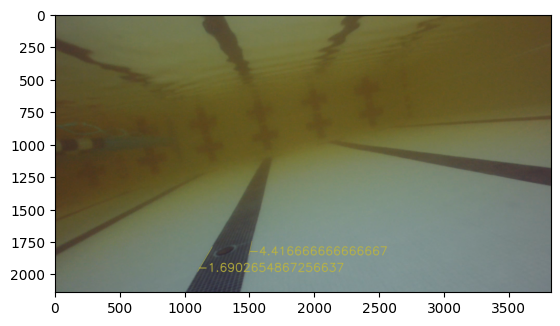

In [14]:
img2 = cv2.imread('lanes.png').copy()

lanes = lane_detection.detect_lanes(lines)
lane_detection.draw_lanes(img2, lanes)


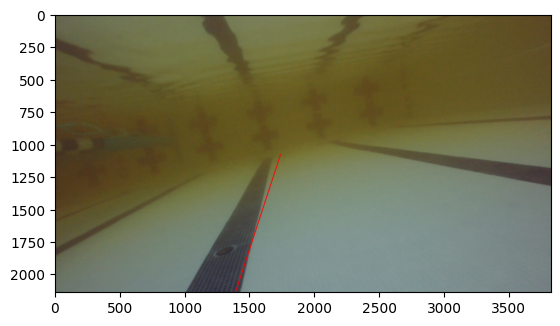

Strafe right
Turn Right
Direction: right
Angle: -71.86655040940269


In [15]:

img3 = cv2.imread('lanes.png').copy()
closest_intercept, closest_slope = lane_following.get_lane_center(lanes)
y_intercept = -closest_slope * closest_intercept
yPoint = 2125 # completely arbitrary amt just has to be bigger than the height of the window
xPoint = (yPoint - y_intercept)/closest_slope
lane_following.draw_center_lane(img3, (1080 - y_intercept)/closest_slope, yPoint1=1080, xPoint2=xPoint, yPoint2=yPoint)
print(f"botton: {(xPoint,yPoint)}")
direction, angle = lane_following.recommend_direction(xPoint, closest_slope)
print(f"Direction: {direction}")
print(f"Angle: {np.rad2deg(angle)}")


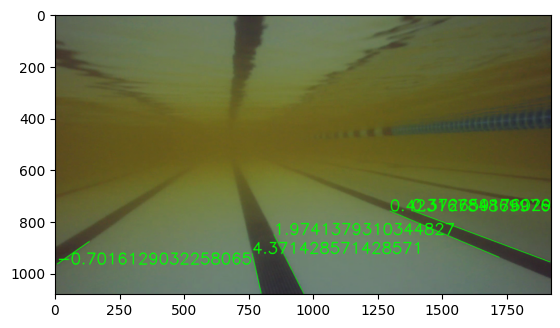

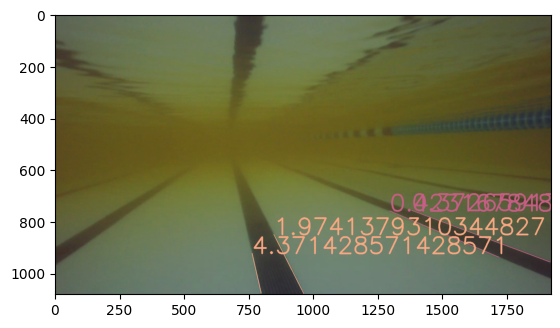

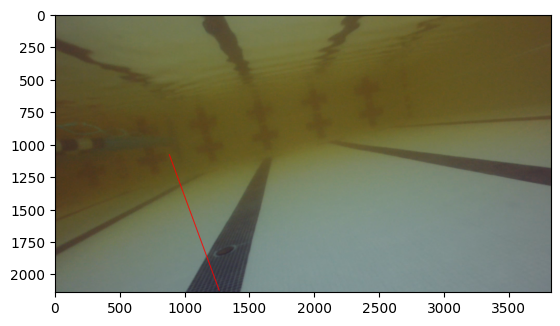

Strafe right
Turn Left
Direction: right
Angle: 69.8138368467067


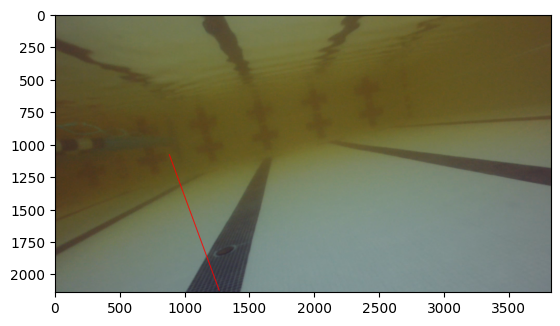

/home/kevinnie/cv-intro/lane_detection.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)
/home/kevinnie/cv-intro/lane_detection.py:60: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (slopes[j-1]/slope, (y_intercepts[j-1]/y_intercept))
/home/kevinnie/cv-intro/lane_detection.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)


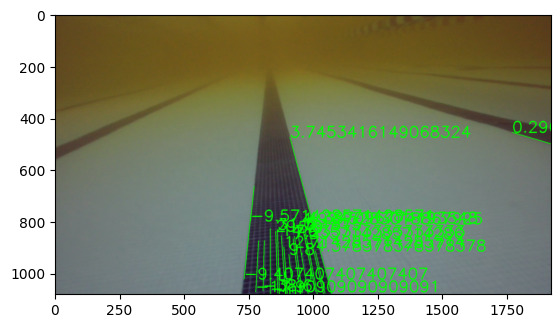

/home/kevinnie/cv-intro/lane_detection.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)
/home/kevinnie/cv-intro/lane_detection.py:99: RuntimeWarning: invalid value encountered in scalar divide
  x_intercept = -(y1 - (x1*slope))/slope


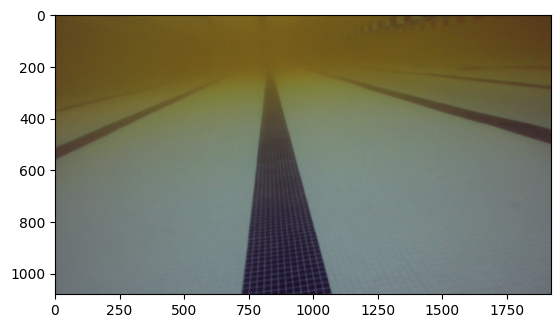

IndexError: list index out of range

In [16]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
ret, imgLane = vid.read()
frequency = 100
count = 0
while ret:
    if count%frequency == 0:
        img = imgLane.copy()
        lines = lane_detection.detect_lines(img, 20, 50, 3, 100, 15)
        lane_detection.draw_lines(img, lines)
        plt.imshow(img)
        plt.show()

        if (lines is None) or len(lines) == 0:
            count += 1
            ret, img = vid.read()
            continue
        
        img2 = imgLane.copy()
        lanes = lane_detection.detect_lanes(lines)
        lane_detection.draw_lanes(img2, lanes)
        plt.imshow(img2)
        plt.show()

        img3 = cv2.imread('lanes.png').copy()
        closest_intercept, closest_slope = lane_following.get_lane_center(lanes)
        y_intercept = -closest_slope * closest_intercept
        yPoint = 2125 # completely arbitrary amt just has to be bigger than the height of the window
        xPoint = (yPoint - y_intercept)/closest_slope
        lane_following.draw_center_lane(img3, (1080 - y_intercept)/closest_slope, yPoint1=1080, xPoint2=xPoint, yPoint2=yPoint)
        direction, angle = lane_following.recommend_direction(xPoint, closest_slope)
        print(f"Direction: {direction}")
        print(f"Angle: {np.rad2deg(angle)}")
        plt.imshow(img3)
        plt.show()
        
    count += 1
    ret, imgLane = vid.read()